In [1]:
#Import Initial Library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set(palette='rainbow')

In [2]:
df = pd.read_csv('qs-world-university-rankings-2017-to-2022-V2.csv')

### PART ONE

In [3]:
df.head(3)

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,"3,730",M,"3,065"
1,Stanford University,2017,2,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,"3,879",L,"4,725"
2,Harvard University,2017,3,98.3,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,"5,877",L,"4,646"


In [4]:
#By using the .info() method we can see all the variable info, their missing rows , their dtype.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482 entries, 0 to 6481
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   university              6482 non-null   object 
 1   year                    6482 non-null   int64  
 2   rank_display            6414 non-null   object 
 3   score                   2820 non-null   float64
 4   link                    6482 non-null   object 
 5   country                 6482 non-null   object 
 6   city                    6304 non-null   object 
 7   region                  6482 non-null   object 
 8   logo                    6482 non-null   object 
 9   type                    6470 non-null   object 
 10  research_output         6480 non-null   object 
 11  student_faculty_ratio   6407 non-null   float64
 12  international_students  6318 non-null   object 
 13  size                    6480 non-null   object 
 14  faculty_count           6404 non-null   

We can see there are lots of columns that has missing values

You must generate plots that can give hints about the data distribution and a discussion about the results must be done.

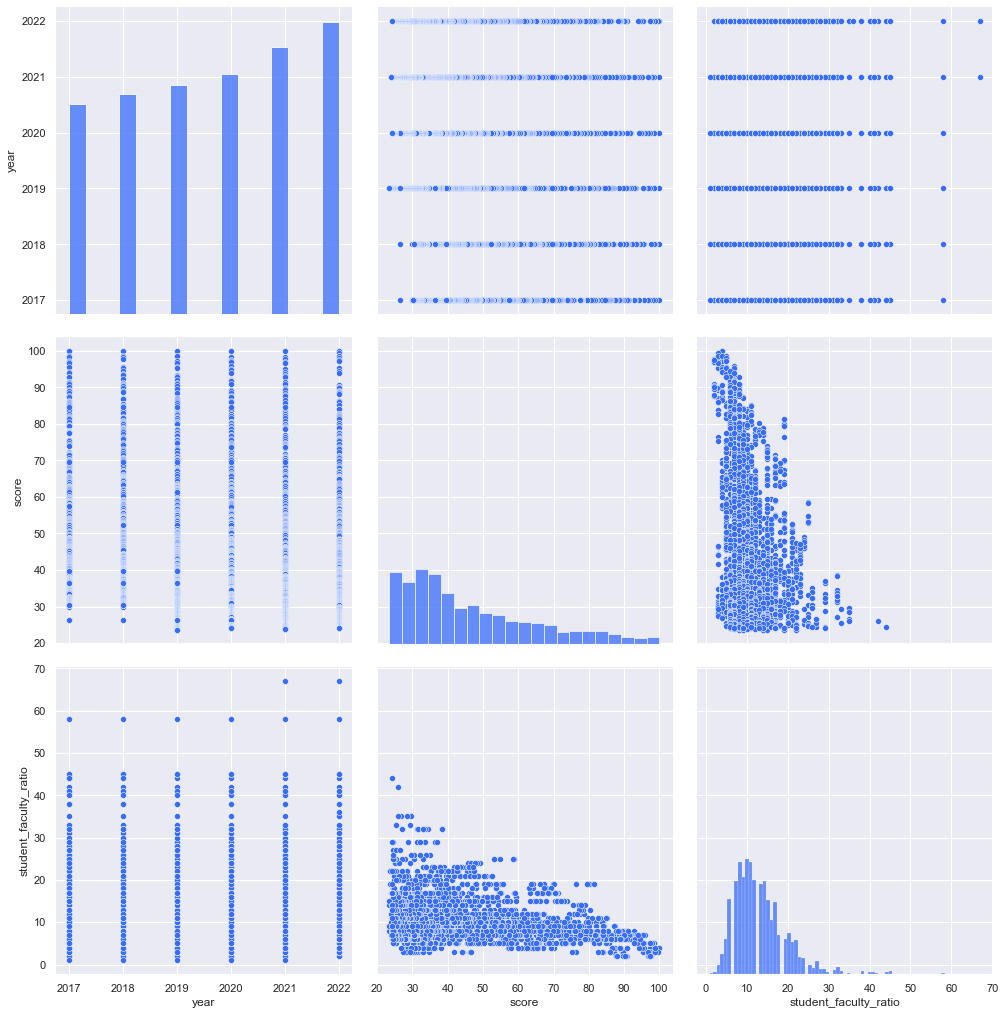

In [5]:
## CHecking a quick plot for all the columns # how they distributed, 
_pairplot = sns.pairplot(df)
_pairplot.fig.set_size_inches(15,15)
plt.show()

From the above plot we can there are many plot that are not normally distributed.
For example the Faculty_count column vs student_facutly_ratio is skwed , so that distribution is not normal

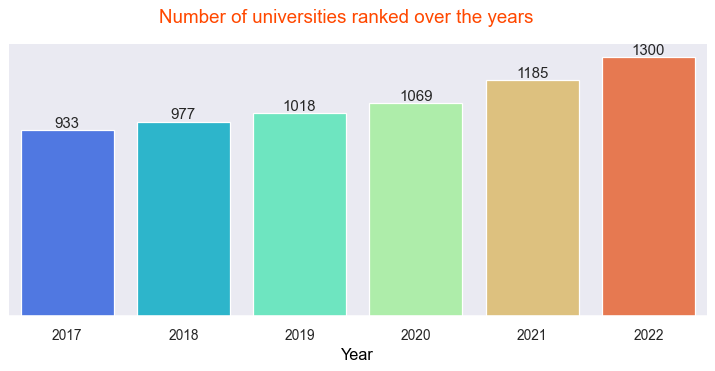

In [6]:
#To Describe the DataFrame more. We can plot and analysis the university have been ranked over the years
year_df = df['year'].value_counts().sort_values()
fig, ax = plt.subplots(figsize=(10,4), dpi=90)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(bottom=False)
ax.get_yaxis().set_visible(False)

sns.countplot(data=df, x='year', palette='rainbow');

# add values on top of each bar
ax.bar_label(ax.containers[0])

ax.set_xlabel('Year', fontsize=13, color = 'black');
fig.suptitle('Number of universities ranked over the years', fontsize=15, color = '#ff4800');

From the above plot we can clearly see, each year the more university is coming to consider for that ranking. As 2022 has the highest amount


In [7]:
# For further analysis we can check which university keeping the top position for the past few years
# university_df.sort_values('rank_display')[:60]
top_unis = ['Massachusetts Institute of Technology (MIT) ', 'Stanford University', 'University of Oxford', 'Harvard University', 'University of Cambridge', 'California Institute of Technology (Caltech)', 'ETH Zurich - Swiss Federal Institute of Technology', 'Imperial College London', 'UCL', 'University of Chicago']
topunis_df = df[df['university'].isin(top_unis)][['year','university','rank_display']].reset_index(drop=True)

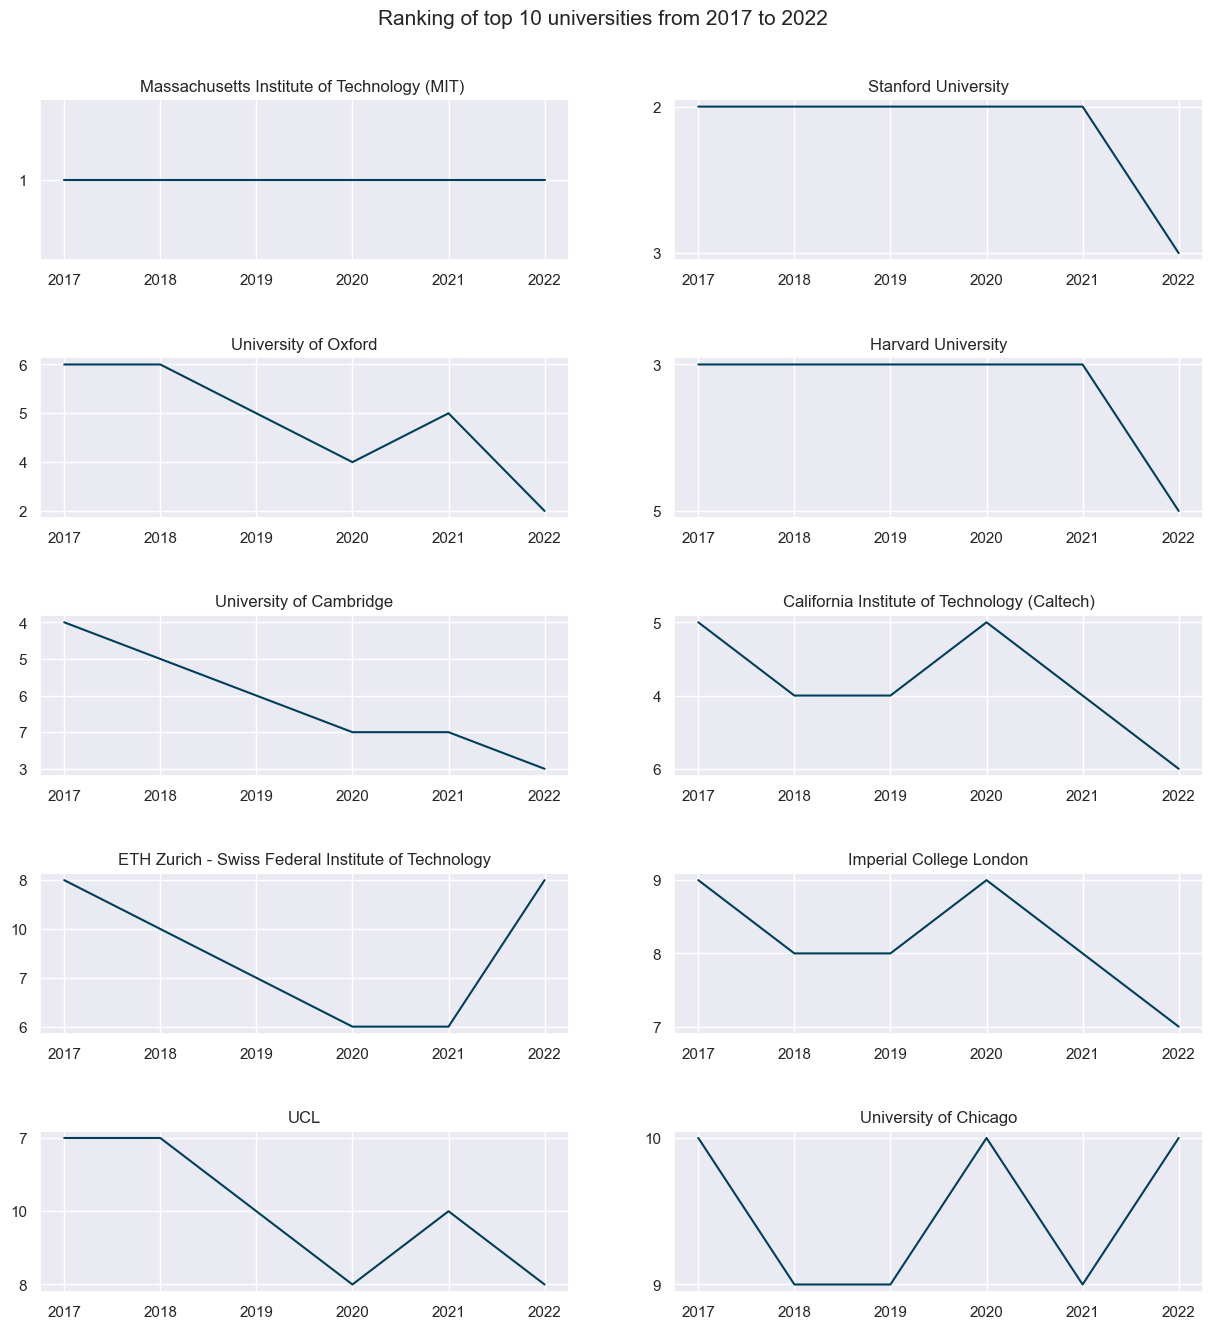

In [8]:
fig = plt.figure(figsize=(15,15), dpi=100)

for uni, i in zip(top_unis, range(1, 11)):
    new_df = topunis_df[topunis_df['university'] == uni]
    ax = fig.add_subplot(5, 2, i)
    ax.plot(new_df['year'], new_df['rank_display'], color='#003f5c', linewidth=1.5)
    plt.gca().invert_yaxis()
    ax.set_title(uni)
    
fig.subplots_adjust(wspace=0.2, hspace=0.6, top=0.92)
fig.suptitle('Ranking of top 10 universities from 2017 to 2022', fontsize=15);

From the above chart.
We can see MIT hold it's position at number one for the last 5 years.
Wheres other university from top 10 always have their ups and downs.
Stanford and Harvard have dropped down this year for the first time since 2017.
 University of Oxford, the oldest university in the English-speaking world, has jumped from Rank 6 to Rank 2.
 On an overall scale, universities from UK have spiked up on their rankings compared to the US universities most of which have dropped down this year (2022).
 Out of the top 10, Only one university, ETH Zurich (Switzerland), is from a country other than US or UK.

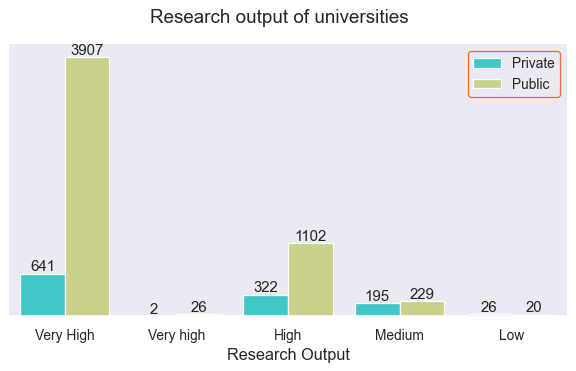

In [9]:
# Now let's check what this top university priorities more to get their top 10 position
# As research is very import for any university
# let's see how much they prioritize the research
fig, ax = plt.subplots(figsize=(8,4), dpi=90)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(bottom=False)
ax.get_yaxis().set_visible(False)

sns.countplot(data=df, x='research_output', hue='type', palette='rainbow');

for container in ax.containers:
    ax.bar_label(container)

plt.legend(edgecolor='#ff4800');
ax.set_xlabel('Research Output', fontsize=13);
fig.suptitle('Research output of universities', fontsize=15);

From the above chart we can see, public university has the highest prioritize in doing research than private universities

In [10]:
#now lets check missing values

round(df.isnull().sum())

university                   0
year                         0
rank_display                68
score                     3662
link                         0
country                      0
city                       178
region                       0
logo                         0
type                        12
research_output              2
student_faculty_ratio       75
international_students     164
size                         2
faculty_count               78
dtype: int64

In [11]:
#Percentage of missing values in every columns so that we can remove the columns that has highest missing values 
#Because the columns with greater missing values will not server any purpose
round(df.isnull().sum() * 100 / len(df))

university                 0.0
year                       0.0
rank_display               1.0
score                     56.0
link                       0.0
country                    0.0
city                       3.0
region                     0.0
logo                       0.0
type                       0.0
research_output            0.0
student_faculty_ratio      1.0
international_students     3.0
size                       0.0
faculty_count              1.0
dtype: float64

In [12]:
#Creating a copy of the dataframe to further analysis without chaning the main dataframe
df2 = df.copy()
#we can see theres more than 50% missing data in score column. so we will drop this column.
df2.drop(['score'], axis=1, inplace=True)

In [13]:
#Rows which have more than 4 null values have been dropped!
drop_index = df2[df2.isnull().sum(axis=1) > 4].index.tolist()
df2.drop(drop_index, inplace=True)

In [14]:
df2.head(5)

,university,year,rank_display,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,"3,730",M,"3,065"
1,Stanford University,2017,2,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,"3,879",L,"4,725"
2,Harvard University,2017,3,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,"5,877",L,"4,646"
3,University of Cambridge,2017,4,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very high,4.0,"7,925",L,"5,800"
4,California Institute of Technology (Caltech),2017,5,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,2.0,692,S,968


In [15]:
#Converting the 'international_students', 'faculty_count' and 'rank_display' column to numerical by removing all the special characters in them
#So, that we can visulize them without having any weird issue
import re
df2['research_output'] = df2['research_output'].replace('Very high', 'Very High')
df2['international_students'] = df2['international_students'].apply(lambda x: float(str(x).replace(',','')))
df2['faculty_count'] = df2['faculty_count'].apply(lambda x: float(str(x).replace(',','')))
df2['rank_display'] = df2['rank_display'].apply(lambda x: float(re.sub(r'\W+', '', str(x))))


In [16]:
df2.head(5)

,university,year,rank_display,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,3730.0,M,3065.0
1,Stanford University,2017,2.0,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,3879.0,L,4725.0
2,Harvard University,2017,3.0,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,5877.0,L,4646.0
3,University of Cambridge,2017,4.0,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very High,4.0,7925.0,L,5800.0
4,California Institute of Technology (Caltech),2017,5.0,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,2.0,692.0,S,968.0


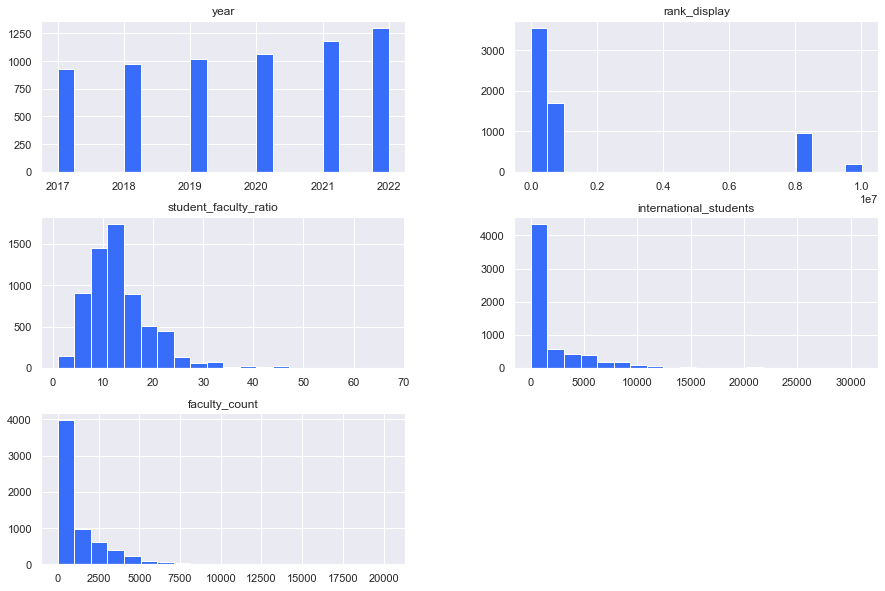

In [17]:
df2.hist(bins=20,figsize=(15, 10))
plt.show()

from the above plot we can se how the data is distributed in different features. 

So from all the above plot and description we did see that 'student_faculty_ratio' plot are right skewd.  So There might have some significance outliers to remove
Let's check

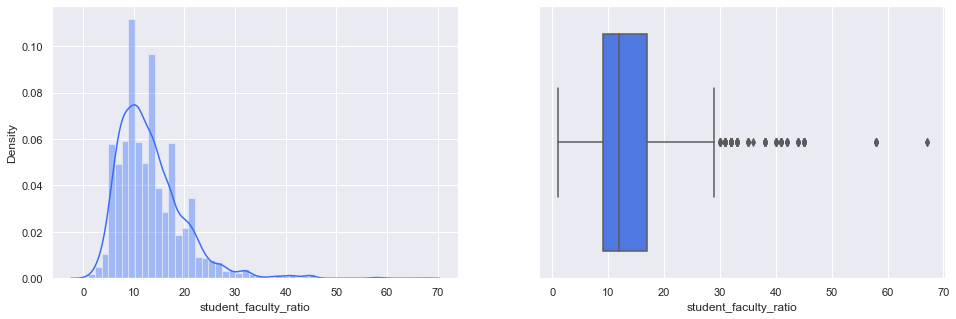

In [18]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df2['student_faculty_ratio'])
plt.subplot(1,2,2)
sns.boxplot(df2['student_faculty_ratio'])
plt.show()

As we can see this column has outliers (it is shown at boxplot) and it is right-skewed data(it is easily seen at histogram). Boxplot is the best way to see outliers.

In [19]:
#removing outliers
df3 = df2.copy()
cols = ['student_faculty_ratio'] # one or more

Q1 = df3[cols].quantile(0.25)
Q3 = df3[cols].quantile(0.75)
IQR = Q3 - Q1

df3 = df3[~((df3[cols] < (Q1 - 1.5 * IQR)) |(df3[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

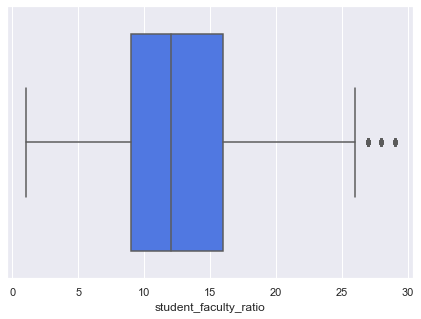

In [20]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df3['student_faculty_ratio'])
plt.show()

so till now we remove missing value rows and outliers. next we will do data scaling in part 2.

# PART TWO

In [21]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler #Selecting three scaler
from sklearn.pipeline import make_pipeline

In [22]:
df3.head()

,university,year,rank_display,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,3730.0,M,3065.0
1,Stanford University,2017,2.0,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,3879.0,L,4725.0
2,Harvard University,2017,3.0,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,5877.0,L,4646.0
3,University of Cambridge,2017,4.0,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very High,4.0,7925.0,L,5800.0
4,California Institute of Technology (Caltech),2017,5.0,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,2.0,692.0,S,968.0


In [23]:
#To perfrom the scaling technique i have choose
# StandardScaler because it performs on every features and try to make uniform distribution.
# MinMaxScaler is a way to make your feature into(0,1). so it's a great way to hadling any outliers
# Like MinMaxScaler MaxAbsScaler also turn the values of feature uniformly but here it sets each values in the training set 1.0


In [24]:
#BEFORE USING ANY SCALER LET"S MAPPING  THE DATAFRAME SO THAT IT CAN FIT.
#As our goal is to determine the type of a univeristy based on it's research,student,size
#Let's map the dataframe
update_df = df3.iloc[:,5:]

In [25]:
#Mapping the size column
np.unique(df3[['size']].values)

array(['L', 'M', 'S', 'XL'], dtype=object)

In [26]:
#Mapping Size 
# L=1 (Large)
# M=2 (Medium)
# S=3 (small)
# XL=4 (Extra Large)
update_df['size'] = update_df['size'].map({'L': 1, 'M': 2,'S':3,'XL':4})

In [27]:
#Mapping the research column
np.unique(df3[['research_output']].values)

array(['High', 'Low', 'Medium', 'Very High'], dtype=object)

In [28]:
#Mapping Size 
# High=1 (Large)
# Low=2 (Medium)
# Medium=3 (small)
# Very High=4 (Extra Large)
update_df['research_output'] = update_df['research_output'].map({'High': 1, 'Low': 2,'Medium':3,'Very High':4})

In [29]:
#Mapping the continent column
np.unique(df3[['region']].values)

array(['Africa', 'Asia', 'Europe', 'Latin America', 'North America',
       'Oceania'], dtype=object)

In [30]:
#Africa = 1
#Asia = 2
#Europe =3
#North America = 4
#Oceania = 5
#South America= 6
update_df['region'] = update_df['region'].map({'Africa': 1, 'Asia': 2,'Europe':3,'North America':4,'Oceania':5,'South America':6})

In [31]:
update_df['type'] = update_df['type'].map({'Private': 1, 'Public': 0})

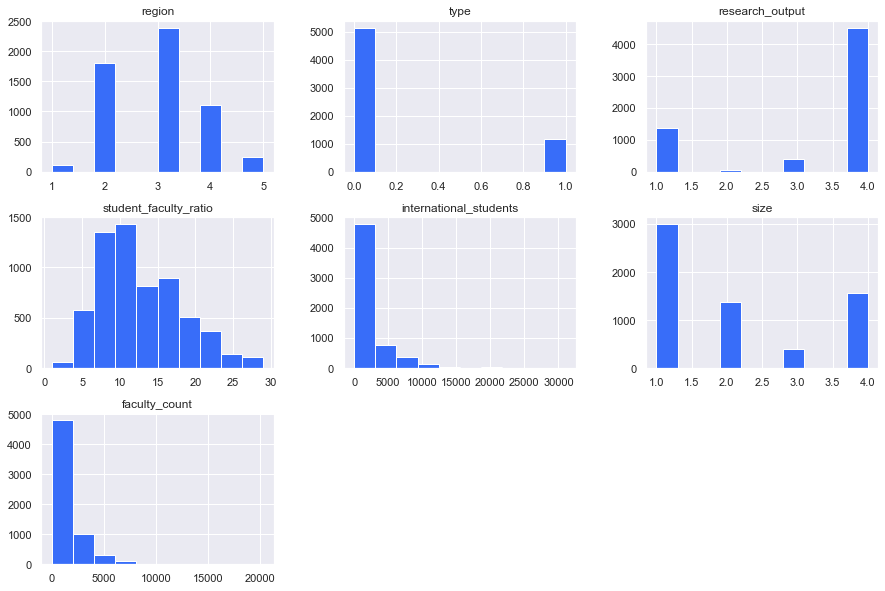

In [32]:
update_df.hist(bins=10,figsize=(15, 10))
plt.show()

In [33]:
# Before Doing the Scaling let's seperate our features and target column
# _features = update_df.loc[:, update_df.columns != 'type']
# _target = update_df['type']
_features = update_df.copy()


In [34]:
_features.head()

,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Cambridge,4.0,https://www.topuniversities.com/sites/default/...,1.0,4,4.0,3730.0,2,3065.0
1,Stanford,4.0,https://www.topuniversities.com/sites/default/...,1.0,4,3.0,3879.0,1,4725.0
2,Cambridge,4.0,https://www.topuniversities.com/sites/default/...,1.0,4,5.0,5877.0,1,4646.0
3,Cambridge,3.0,https://www.topuniversities.com/sites/default/...,0.0,4,4.0,7925.0,1,5800.0
4,Pasadena,4.0,https://www.topuniversities.com/sites/default/...,1.0,4,2.0,692.0,3,968.0


In [35]:
_features.drop(['city','logo'], axis=1, inplace=True)

                 0            1            2            3            4  \
count  5685.000000  6315.000000  6325.000000  6255.000000  6166.000000   
mean      0.481003     0.186698     0.757787     0.417055     0.064758   
std       0.219386     0.389700     0.409674     0.191716     0.113929   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.250000     0.000000     0.666667     0.285714     0.000098   
50%       0.500000     0.000000     1.000000     0.392857     0.015363   
75%       0.500000     0.000000     1.000000     0.535714     0.085513   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                 5            6  
count  6325.000000  6254.000000  
mean      0.360685     0.065265  
std       0.410489     0.092199  
min       0.000000     0.000000  
25%       0.000000     0.000088  
50%       0.333333     0.037075  
75%       0.666667     0.091137  
max       1.000000     1.000000  


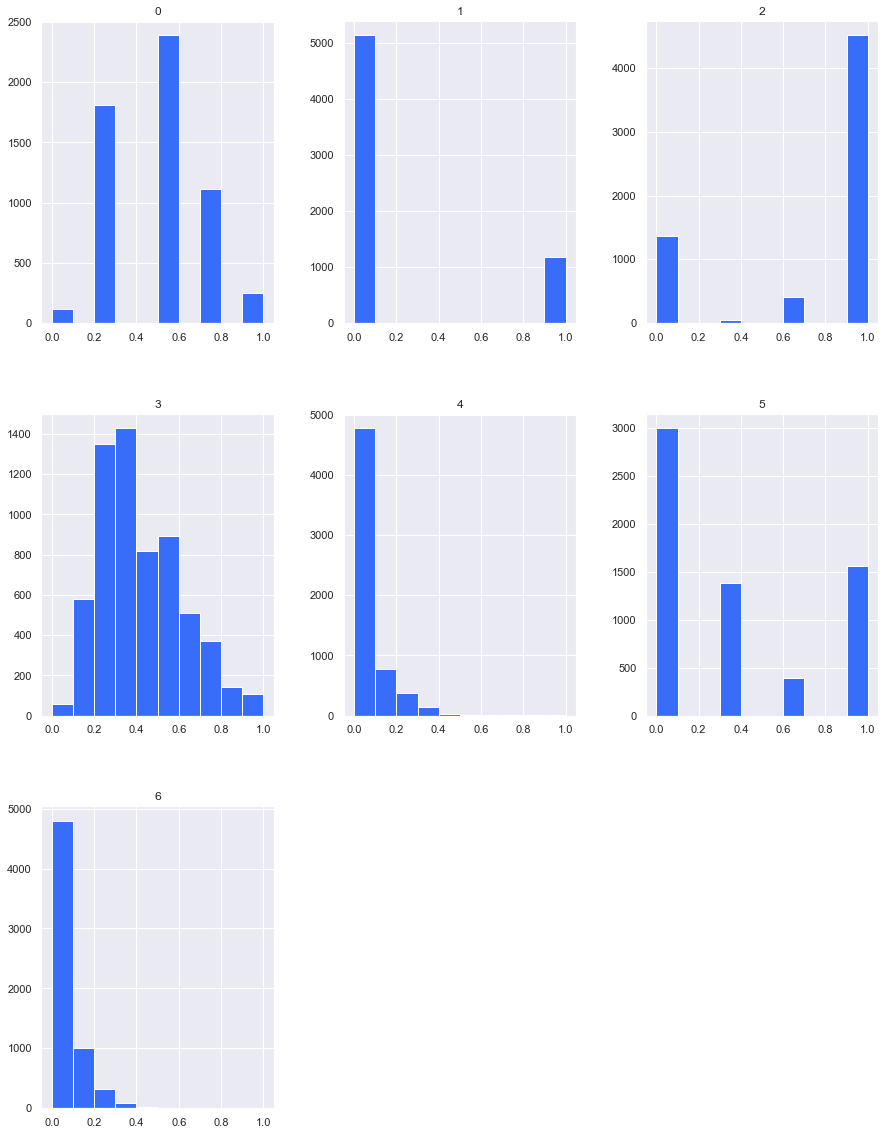

In [36]:
_minMaxScaler = MinMaxScaler()
data = _minMaxScaler.fit_transform(_features)
# convert the array back to a dataframe
dataset = pd.DataFrame(data)
# summarize
print(dataset.describe())
# histograms of the variables
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
dataset.hist(ax = ax)
# dataset.hist()
plt.show()

                  0             1             2             3             4  \
count  5.685000e+03  6.315000e+03  6.325000e+03  6.255000e+03  6.166000e+03   
mean   2.049997e-15 -4.767894e-16 -1.851764e-15 -4.059636e-16 -8.088099e-17   
std    1.000088e+00  1.000079e+00  1.000079e+00  1.000080e+00  1.000081e+00   
min   -2.192683e+00 -4.791201e-01 -1.849878e+00 -2.175554e+00 -5.684489e-01   
25%   -1.053041e+00 -4.791201e-01 -2.224382e-01 -6.851345e-01 -5.675868e-01   
50%    8.660076e-02 -4.791201e-01  5.912816e-01 -1.262270e-01 -4.335885e-01   
75%    8.660076e-02 -4.791201e-01  5.912816e-01  6.189830e-01  1.821893e-01   
max    2.365885e+00  2.087159e+00  5.912816e-01  3.040915e+00  8.209635e+00   

                  5             6  
count  6.325000e+03  6.254000e+03  
mean   3.677691e-16 -1.990377e-16  
std    1.000079e+00  1.000080e+00  
min   -8.787414e-01 -7.079192e-01  
25%   -8.787414e-01 -7.069611e-01  
50%   -6.663746e-02 -3.057660e-01  
75%    7.454665e-01  2.806407e-01  


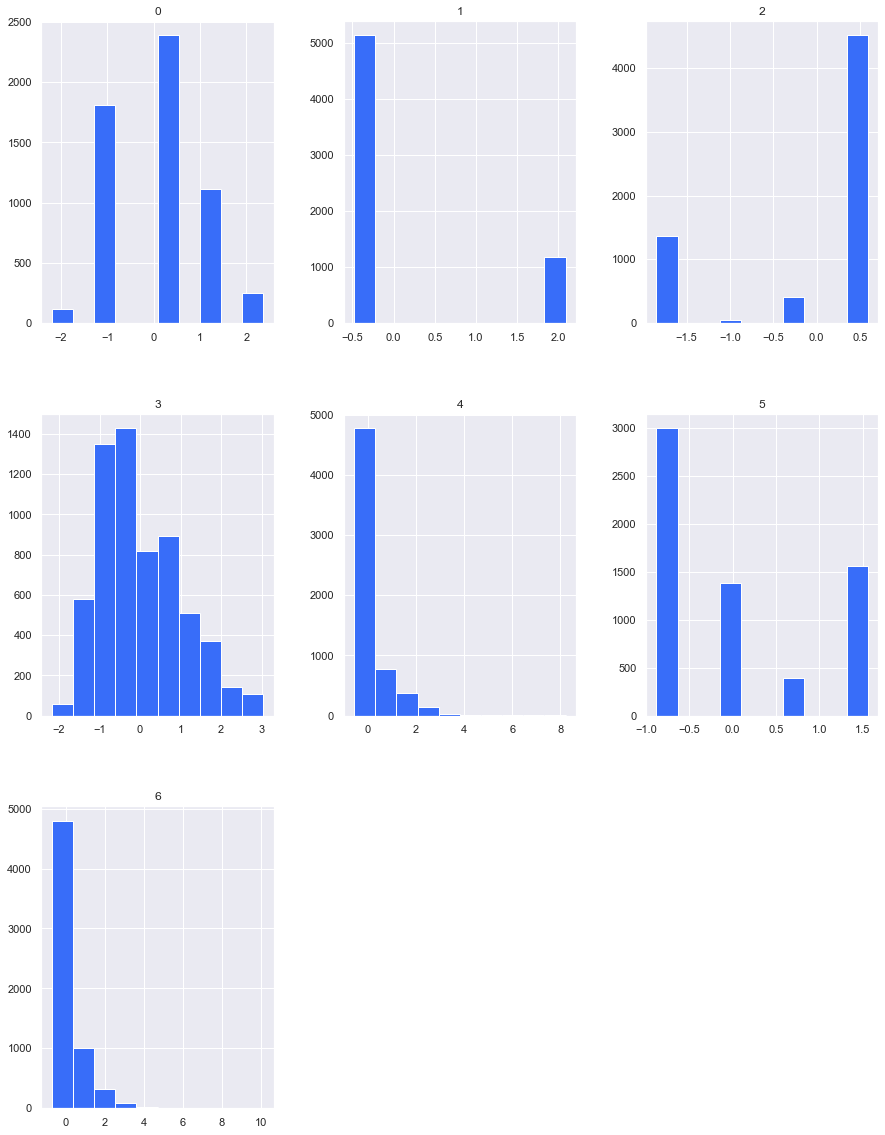

In [37]:
# perform a standard scaler transform of the dataset
trans = StandardScaler()
data = trans.fit_transform(_features)
# convert the array back to a dataframe
dataset = pd.DataFrame(data)
# summarize
print(dataset.describe())
# histograms of the variables
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
dataset.hist(ax = ax)
plt.show()

                 0            1            2            3            4  \
count  5685.000000  6315.000000  6325.000000  6255.000000  6166.000000   
mean      0.584802     0.186698     0.818340     0.437156     0.064788   
std       0.175509     0.389700     0.307255     0.185105     0.113926   
min       0.200000     0.000000     0.250000     0.034483     0.000032   
25%       0.400000     0.000000     0.750000     0.310345     0.000130   
50%       0.600000     0.000000     1.000000     0.413793     0.015395   
75%       0.600000     0.000000     1.000000     0.551724     0.085542   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                 5            6  
count  6325.000000  6254.000000  
mean      0.520514     0.065311  
std       0.307867     0.092195  
min       0.250000     0.000049  
25%       0.250000     0.000138  
50%       0.500000     0.037123  
75%       0.750000     0.091182  
max       1.000000     1.000000  


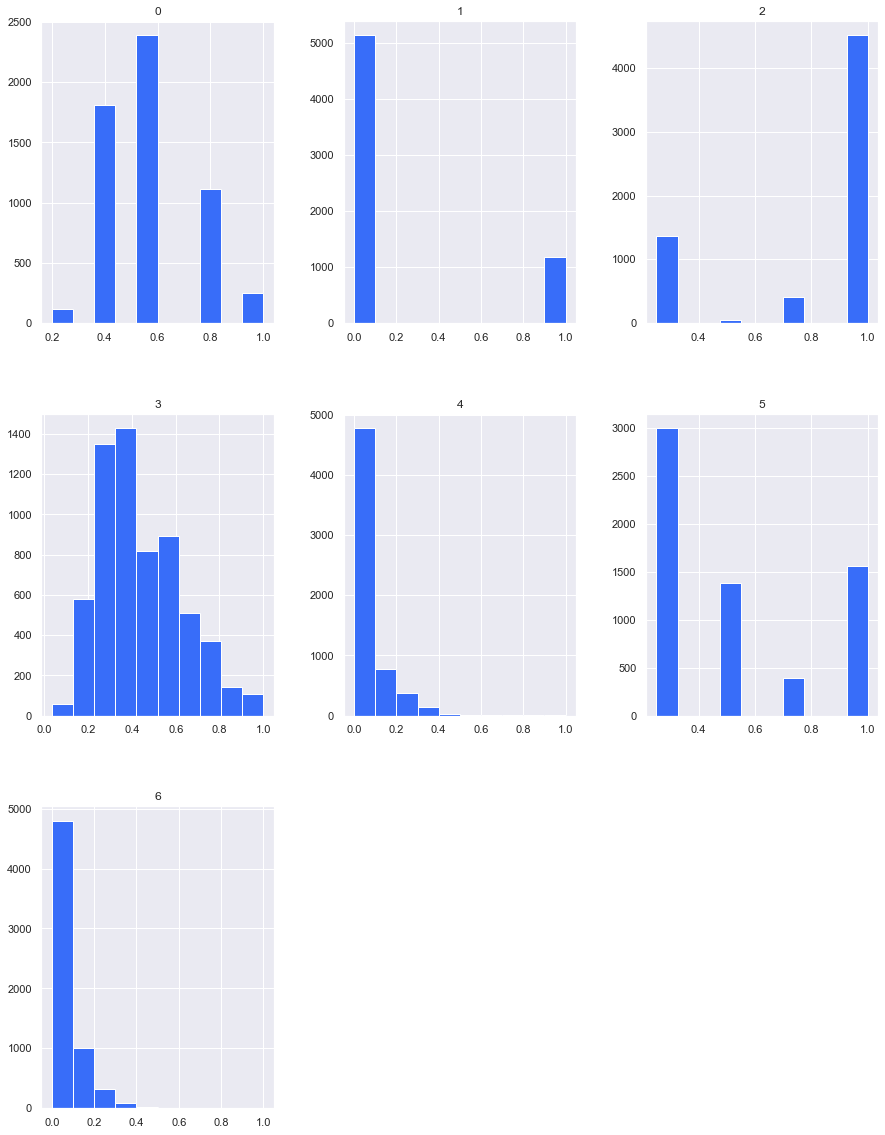

In [38]:
# perform a maxabs scaler transform of the dataset
trans = MaxAbsScaler()
data = trans.fit_transform(_features)
# convert the array back to a dataframe
dataset = pd.DataFrame(data)
# summarize
print(dataset.describe())
# histograms of the variables
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
dataset.hist(ax = ax)
plt.show()

In [39]:

df4= _features
scaler = MinMaxScaler()
df5 = pd.DataFrame(scaler.fit_transform(df4),
                   columns=_features.columns,
                   index = _features.index)

<AxesSubplot:title={'center':'After Scaling'}, xlabel='international_students', ylabel='faculty_count'>

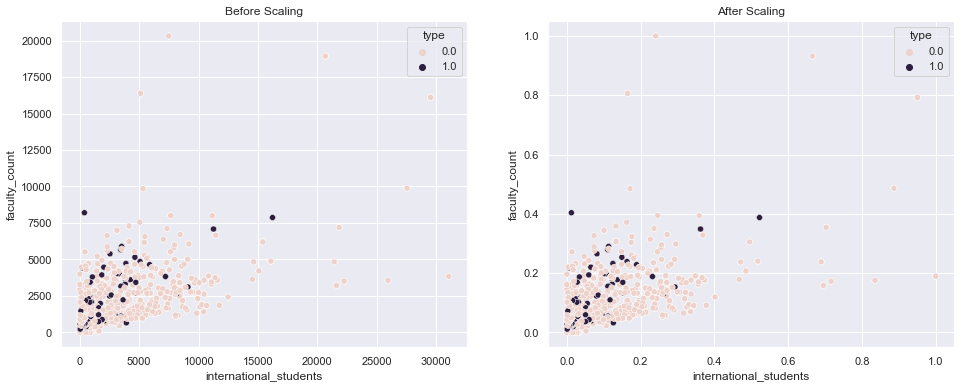

In [40]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))

ax1.set_title('Before Scaling')
sns.scatterplot(x='international_students', y='faculty_count', data=df4, ax=ax1,hue=df4['type'])

ax2.set_title('After Scaling')
sns.scatterplot(x='international_students', y='faculty_count', data=df5, ax=ax2, hue=df5['type'])

In [41]:
scaler = StandardScaler()
df5 = pd.DataFrame(scaler.fit_transform(df4),
                   columns=_features.columns,
                   index = _features.index)

<AxesSubplot:title={'center':'After Scaling'}, xlabel='international_students', ylabel='faculty_count'>

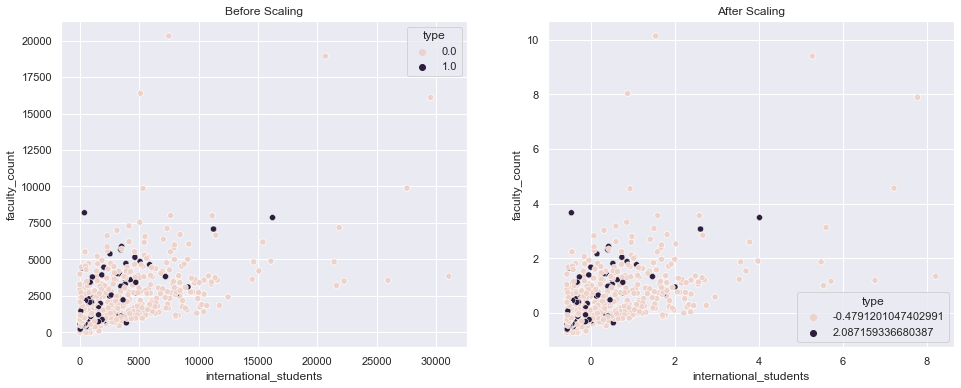

In [42]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))

ax1.set_title('Before Scaling')
sns.scatterplot(x='international_students', y='faculty_count', data=df4, ax=ax1,hue=df4['type'])

ax2.set_title('After Scaling')
sns.scatterplot(x='international_students', y='faculty_count', data=df5, ax=ax2, hue=df5['type'])

In [43]:
scaler = MaxAbsScaler()
df5 = pd.DataFrame(scaler.fit_transform(df4),
                   columns=_features.columns,
                   index = _features.index)

<AxesSubplot:title={'center':'After Scaling'}, xlabel='international_students', ylabel='faculty_count'>

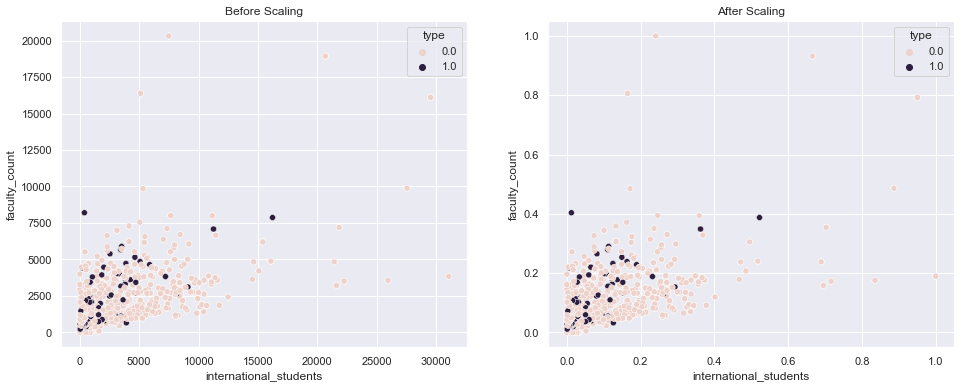

In [44]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))

ax1.set_title('Before Scaling')
sns.scatterplot(x='international_students', y='faculty_count', data=df4, ax=ax1,hue=df4['type'])

ax2.set_title('After Scaling')
sns.scatterplot(x='international_students', y='faculty_count', data=df5, ax=ax2, hue=df5['type'])

# PART 3

In [45]:
round(df4.isnull().sum()),round(df5.isnull().sum())

(region                    640
 type                       10
 research_output             0
 student_faculty_ratio      70
 international_students    159
 size                        0
 faculty_count              71
 dtype: int64,
 region                    640
 type                       10
 research_output             0
 student_faculty_ratio      70
 international_students    159
 size                        0
 faculty_count              71
 dtype: int64)

In [46]:
update_df = df4.copy()

In [47]:
update_df.ffill(inplace=True)

In [48]:
round(update_df.isnull().sum())

region                    0
type                      0
research_output           0
student_faculty_ratio     0
international_students    0
size                      0
faculty_count             0
dtype: int64

<AxesSubplot:xlabel='region', ylabel='international_students'>

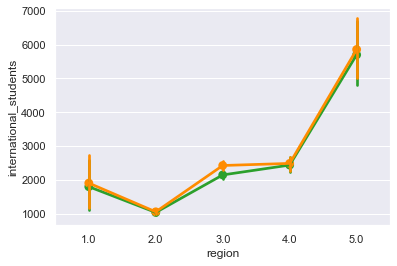

In [49]:
sns.pointplot(x="region",y="international_students",data=update_df,color='tab:green')
sns.pointplot(x="region",y="international_students",data=df4,color='darkorange')

ffill — forward fill — it propagates the last observed non-null value forward.

If we have region recorded for international students in our dataset, we can fill the missing values by ffill. It will be more accurate when compared to the mean/median for this type of dataset.
Here green line shows the data without missing data and orange line shows with missing data.

In [50]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.neighbors import KNeighborsClassifier


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.feature_selection import chi2,f_classif,mutual_info_classif
from sklearn.feature_selection import SelectKBest


from imblearn.pipeline import Pipeline
from imblearn import FunctionSampler

In [51]:
#After importing all the necessary libaray we use the 'FunctionSampler' to call our function as a sampler. 
# then we define which classifier will be used. 

It’s now time to train some machine learning algorithms on our data to compare the effects of different scaling techniques on the performance of the algorithm. I want to see the effect of scaling on three algorithms in particular: K-Nearest Neighbours, Support Vector Regressor

In [52]:
X = update_df.loc[:, update_df.columns != 'type']
Y = update_df['type']

In [53]:
features = X.columns.tolist()

In [54]:
# spliting training and testing data
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=27)

In [56]:
# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [57]:
# fit scaler on training data
maxn = MaxAbsScaler().fit(X_train)

# transform training data
X_train_abs = maxn.transform(X_train)

# transform testing dataabs
X_test_abs = maxn.transform(X_test)

In [58]:
# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = features

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [59]:

from sklearn.metrics import mean_squared_error
# training a KNN model
from sklearn.neighbors import KNeighborsRegressor
# knn 
knn = KNeighborsRegressor(n_neighbors=2)

rmse = []

# raw, normalized and standardized training and testing data
trainX = [X_train, X_train_norm, X_train_stand,X_train_abs]
testX = [X_test, X_test_norm, X_test_stand,X_test_abs]

# model fitting and measuring RMSE
for i in range(len(trainX)):
    
    # fit
    knn.fit(trainX[i],y_train)
    # predict
    pred = knn.predict(testX[i])
    # RMSE
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))

# visualizing the result
df_knn = pd.DataFrame({'RMSE':rmse},index=['Original','MinMax','StandardScaler','MaxABS'])
df_knn

,RMSE
Original,0.157174
Normalized,0.144736
Standardized,0.154638
MaxABS,0.141979


You can see that scaling the features has brought down the RMSE score of our KNN model. Specifically, the MaxAbs data performs a tad bit better than the other data.

Note: I am measuring the RMSE here because this competition evaluates the RMSE.

In [60]:
# training an SVR model
from  sklearn.svm import SVR
# measuring RMSE score
from sklearn.metrics import mean_squared_error

# SVR
svr = SVR(kernel='rbf',C=5)

rmse = []

# raw, normalized and standardized training and testing data
trainX = [X_train, X_train_norm, X_train_stand,X_train_abs]
testX = [X_test, X_test_norm, X_test_stand,X_test_abs]

# model fitting and measuring RMSE
for i in range(len(trainX)):
    
    # fit
    svr.fit(trainX[i],y_train)
    # predict
    pred = svr.predict(testX[i])
    # RMSE
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))

# visualizing the result    
df_svr = pd.DataFrame({'RMSE':rmse},index=['Original','MinMax','StandardScaler','MaxABS'])
df_svr

,RMSE
Original,0.402121
Normalized,0.338765
Standardized,0.314705
MaxAbs,0.337891


We can see that scaling the features does bring down the RMSE score. And the standardized data has performed better than the other data. 

The lower the RMSE, the better a given model is able to “fit” a dataset.
Above, from the code we can see KNeighborsRegressor with MaxAbs Scaler gain the RMSE = 0.141979 which is much lesser than the other regressor.

# part 4

In [61]:
#Define a target value to forecast
X = update_df.loc[:, update_df.columns != 'type']
Y = update_df['type']


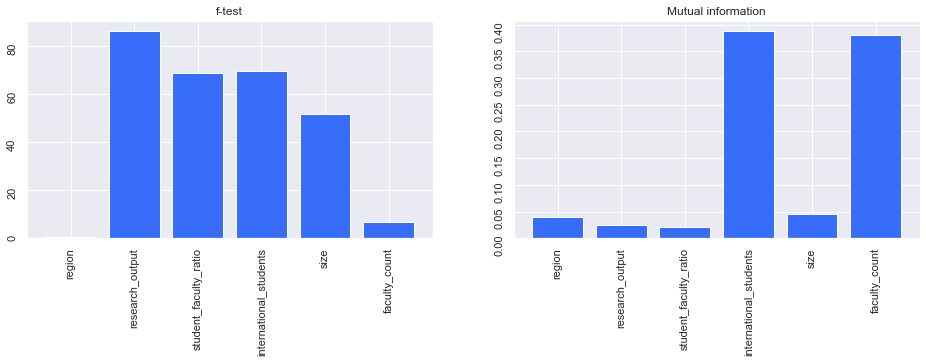

In [62]:


from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

# feature selection
def select_features(X, y, score_function):
    # configure to select all features
    sel = SelectKBest(score_func=score_function, k='all')
    # learn relationship from training data
    sel.fit(X, y)
    return sel
# getting the columns of X
cols=X.columns
# feature selection
fs = select_features(X, Y, f_classif)
mi = select_features(X, Y, mutual_info_classif)
# plot the scores
fig, axs = plt.subplots(1, 2, figsize=(16,4))
axs = axs.flatten()
axs[0].bar(cols, fs.scores_)
axs[0].tick_params(labelrotation=90)
axs[0].set_title('f-test')
axs[1].bar(cols, mi.scores_)
axs[1].tick_params(labelrotation=90)
axs[1].set_title('Mutual information')
pyplot.show()

here we choose two fetaure selection techniques that are ANOVA and Mutual Information.
as our dataset contains the categorical  data, these two tenchniques can reduces the performance of data mining algorithms and Slow down the process

In [63]:
#Define as baseline model using all features and store its performance
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score,r2_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [64]:
# Let's print the result without any feature selection from the model we used in part 3
clf_knn = KNeighborsRegressor(n_neighbors=2)      
clr_knn = clf_knn.fit(x_train,y_train)

ac = r2_score(y_test,clf_knn.predict(x_test))

print('Baseline Accuracy is: ',ac)


Baseline Accuracy is:  0.8289272514493606


In [65]:
#now find out the best scored features
select_feature = SelectKBest(f_classif, k=4).fit(x_train, y_train)

In [66]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [ 0.07593721 51.55166954 61.05717569 51.9150512  37.40999617  5.94401617]
Feature list: Index(['region', 'research_output', 'student_faculty_ratio',
       'international_students', 'size', 'faculty_count'],
      dtype='object')


In [67]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
# Using feature selection technique
clf_knn_2 = KNeighborsRegressor(n_neighbors=2)      
clr_knn_2 = clf_knn_2.fit(x_train_2,y_train)
ac_2 = r2_score(y_test,clf_knn_2.predict(x_test_2))
print('Selecting best feature Accuracy is: ',ac_2)


Selecting best feature Accuracy is:  0.8353310441758551


# with the feature selection technique, we get the accuracy 83.53% whereas the baseline accuracy 82.89%. 
so yes, there are improvements with the feature selection technique. and the best features are:
    1.research output.
    2.student facalty ratio
    3.international students
    4.size